In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %tensorflow_version 2.x # << This line comes before the import 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

2021-08-22 13:57:58.628396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-22 13:57:58.628441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df = pd.read_csv('all_yrs_processed.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266387 entries, 0 to 266386
Columns: 545 entries, ein to y_TL
dtypes: float64(218), int64(327)
memory usage: 1.1 GB


In [5]:
df.drop('ein',axis=1, inplace=True)

In [6]:
df.head()

,unrelbusinccd,initiationfees,grsrcptspublicuse,grsincmembers,grsincother,totcntrbgfts,totprgmrevnue,invstmntinc,txexmptbndsproceeds,royaltsinc,...,nonpfreayr-1_8,nonpfreayr-1_9,nonpfreayr-1_11,nonpfreayr-1_12,nonpfreayr-1_13,nonpfreayr-1_14,nonpfreayr-1_15,y_term,y_liq,y_TL
0,0,0,0,0,0,935508,120315,7456,19969,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,5050020,153784,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2945,11440,489,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,220425,468101,0,0,411058,2668044,29316,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,75,735052,783,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,unrelbusinccd,initiationfees,grsrcptspublicuse,grsincmembers,grsincother,totcntrbgfts,totprgmrevnue,invstmntinc,txexmptbndsproceeds,royaltsinc,...,nonpfreayr-1_8,nonpfreayr-1_9,nonpfreayr-1_11,nonpfreayr-1_12,nonpfreayr-1_13,nonpfreayr-1_14,nonpfreayr-1_15,y_term,y_liq,y_TL
count,266387.000000,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,...,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000
mean,0.104284,3.665848e+03,3.186620e+03,2.158111e+05,6.919431e+03,1.568499e+06,5.910035e+06,1.649631e+05,7.404849e+02,2.067959e+04,...,0.004662,0.268238,0.000923,0.028421,0.009486,0.009366,0.009036,0.005222,0.008919,0.013544
std,0.305630,9.193288e+04,6.970756e+04,7.335869e+06,3.889358e+05,6.364980e+07,1.155329e+08,5.508513e+06,6.609736e+04,2.009176e+06,...,0.068122,0.443043,0.030375,0.166173,0.096934,0.096324,0.094626,0.072073,0.094020,0.115589
min,0.000000,-6.975000e+03,-2.592000e+03,0.000000e+00,-2.318009e+07,-2.173370e+05,-1.226788e+08,-8.238400e+07,-6.791210e+05,-3.222000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.424500e+03,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.133400e+04,7.967100e+04,3.690000e+02,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.402395e+05,5.366945e+05,8.787500e+03,0.000000e+00,0.000000e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.744288e+07,1.427130e+07,1.197840e+09,1.083687e+08,3.082145e+10,4.223764e+10,1.748190e+09,1.956747e+07,7.625538e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df[['y_term','y_liq','y_TL']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228181 entries, 1 to 266386
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   y_term  228181 non-null  int64
 1   y_liq   228181 non-null  int64
 2   y_TL    228181 non-null  int64
dtypes: int64(3)
memory usage: 7.0 MB


In [7]:
df = df.dropna()
print(df.shape)

(228181, 544)


In [40]:
y_cols = ['y_term', 'y_liq', 'y_TL']
X = df.drop(columns = y_cols)
y = df[y_cols]

y1 = y['y_TL'].astype('category') # y1 - y full/partial 
yt = y['y_term'].astype('category') # yt - y term (full termination)
yl = y['y_liq'].astype('category')  # yl - y liquid (partial liquidation)

X.shape, y.shape

((228181, 541), (228181, 3))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182544, 541), (45637, 541), (182544,), (45637,))

In [46]:
# Train-train, train-test split
X_input, X_val, y_input, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [51]:
#fully connected model
fc_model = tf.keras.Sequential([tf.keras.layers.Dense(100,activation='tanh',input_shape = (541,)),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
    #tf.keras.layers.Softmax()
    
])

lrate = 0.005
fc_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='binary_crossentropy' ,metrics=['accuracy','FalseNegatives'])

In [15]:
from keras.callbacks import EarlyStopping

In [16]:
def train_model(model, feature, label, val_feature, val_label, epochs, batch_size):
  es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)
  history = model.fit(x=feature,
                      y=label,
                      validation_data=(val_feature, val_label),
                      callbacks=[es],
                      batch_size=batch_size,
                      epochs=epochs)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  accuracy = hist["accuracy"]
  val_accuracy = hist['val_accuracy']
  return trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist

In [43]:
y_input.shape

(146035,)

In [18]:
X_input.shape

(146035, 541)

In [44]:
y_input = np.asarray(y_input).astype('float32').reshape((-1,1))
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))



In [48]:
y_input.shape

(146035,)

In [34]:
y_val.shape

(36509, 1)

In [36]:
fc_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               54200     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 102       
_________________________________________________________________
softmax_1 (Softmax)          (None, 2)                 0         
Total params: 59,352
Trainable params: 59,352
Non-trainable params: 0
_________________________________________________________________


In [52]:
batch_size = 1000
epochs = 30
hist = fc_model.fit(x= X_input,
                      y= y_input,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size,
                      epochs=epochs)

Epoch 1/30
147/147 [==============================] - 2s 8ms/step - loss: 0.0850 - accuracy: 0.9824 - false_negatives: 2042.0000 - val_loss: 0.0741 - val_accuracy: 0.9860 - val_false_negatives: 508.0000
Epoch 2/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0738 - accuracy: 0.9859 - false_negatives: 2047.0000 - val_loss: 0.0731 - val_accuracy: 0.9860 - val_false_negatives: 508.0000
Epoch 3/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0734 - accuracy: 0.9859 - false_negatives: 2047.0000 - val_loss: 0.0731 - val_accuracy: 0.9861 - val_false_negatives: 508.0000
Epoch 4/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0735 - accuracy: 0.9859 - false_negatives: 2047.0000 - val_loss: 0.0732 - val_accuracy: 0.9860 - val_false_negatives: 509.0000
Epoch 5/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9859 - false_negatives: 2047.0000 - val_loss: 0.0727 - val_accuracy: 0.9860 - val_false_negat

In [54]:
trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist = train_model(fc_model, X_input, y_input, X_val, y_val, epochs, batch_size)

Epoch 1/30
147/147 [==============================] - 1s 7ms/step - loss: 0.0734 - accuracy: 0.9860 - false_negatives: 2044.0000 - val_loss: 0.0730 - val_accuracy: 0.9860 - val_false_negatives: 509.0000
Epoch 2/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9860 - false_negatives: 2045.0000 - val_loss: 0.0729 - val_accuracy: 0.9860 - val_false_negatives: 509.0000
Epoch 3/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0732 - accuracy: 0.9860 - false_negatives: 2045.0000 - val_loss: 0.0745 - val_accuracy: 0.9860 - val_false_negatives: 509.0000
Epoch 4/30
147/147 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.9860 - false_negatives: 2045.0000 - val_loss: 0.0737 - val_accuracy: 0.9860 - val_false_negatives: 509.0000
Epoch 5/30
147/147 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9860 - false_negatives: 2043.0000 - val_loss: 0.0729 - val_accuracy: 0.9860 - val_false_negat

In [55]:
def plot_the_accuracy(epochs, accuracy, val_accuracy):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.plot(epochs, accuracy, 'o-', label='train')
  plt.plot(epochs, val_accuracy, 'o-', label='validation')
  plt.legend()
  plt.ylim([accuracy.min()*0.97, accuracy.max()])
  plt.show()

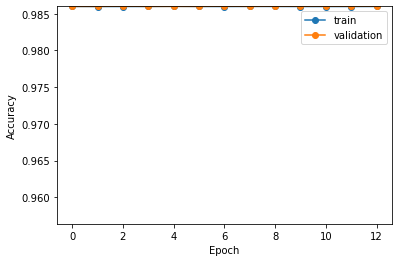

In [56]:
plot_the_accuracy(epochs,accuracy,val_accuracy)

In [58]:
y_input.loc[y_input == 1]

185494    1
264384    1
204715    1
229221    1
170976    1
         ..
18629     1
224479    1
84932     1
138552    1
211345    1
Name: y_TL, Length: 2049, dtype: category
Categories (2, int64): [0, 1]

In [67]:
#fully connected model 2 - using probabilities
fc_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100,activation='tanh',input_shape = (541,)),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(2,activation = 'sigmoid'),
    tf.keras.layers.Softmax()
    
])

lrate = 0.005
fc_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,metrics=['accuracy','FalseNegatives'])

In [68]:
fc_model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               54200     
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 102       
_________________________________________________________________
softmax_2 (Softmax)          (None, 2)                 0         
Total params: 59,352
Trainable params: 59,352
Non-trainable params: 0
_________________________________________________________________


In [69]:
trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist = train_model(fc_model_2, X_input, y_input, X_val, y_val, epochs, batch_size)

TypeError: unsupported operand type(s) for -: 'list' and 'int'